In [2]:
# load the necessary libraries/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load the data do some odservations.

In [3]:
# load the dataset
df = pd.read_csv('restaurant_reviews.csv')

In [4]:
df.head()

,Review,Rating
0,This place has the best dumplings I've ever ha...,5
1,"Came here on a weekend visit to NY, my friend ...",4
2,The best soup dumplings in NYC! There is no ot...,5
3,I was so disappointed with my visit to Joes. N...,1
4,So much fun! we stayed at Hotel 50\r\nRight n...,5


In [5]:
df.tail()

,Review,Rating
7275,"Soup dumplings! Best i ever had. Get them, oth...",4
7276,my favorite soup dumpling place.\r\r\nive been...,5
7277,Its cash only and there is usually a line but ...,5
7278,The crab and pork soup dumplings are great. T...,3
7279,So-so food... I am not coming back to crappy s...,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7280 entries, 0 to 7279
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7280 non-null   object
 1   Rating  7280 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 113.9+ KB


In [7]:
# create a data frame showing missing values and their percentage
missing = pd.DataFrame(df.isnull().sum(), columns = ['missing'])
missing['percentage'] = missing['missing'] / df.shape[0] * 100
missing = missing[missing['missing'] > 0]
missing

,missing,percentage


In [8]:
# check the duplicate rows and remove if any
df.duplicated().sum()

df.drop_duplicates(inplace = True)

In [9]:
# lets do descriptive statistics 
df.describe()

,Rating
count,7270.000000
mean,3.834801
std,1.178673
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


<Axes: xlabel='Rating'>

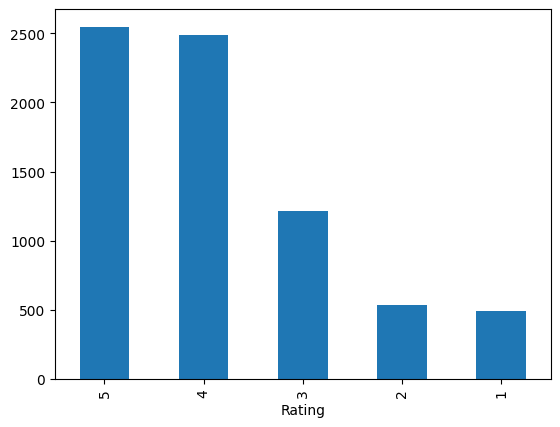

In [10]:
# lets explore the distribution of target variable
df['Rating'].value_counts().plot(kind = 'bar')

In [11]:
# lets check the unique values of each column
for col in df.columns:
    print(col, df[col].nunique())

Review 7270
Rating 5


In [12]:
# lets do some data cleaning
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


In [13]:
# create a function to clean the text data
def clean_text(text):
    # remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # convert text to lower case
    text = text.lower()
    # remove extra whitespaces
    text = text.strip()
    # remove extra tabs
    text = text.replace('\t', ' ')
    # remove extra newlines
    text = text.replace('\n', ' ')
    # remove stop words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    # lemmatize the text
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word, pos = 'v') for word in words]
    text = ' '.join(words)
    return text

In [14]:
df['Review'] = df['Review'].apply(clean_text)

In [15]:
df.head()

,Review,Rating
0,place best dumplings ive ever family go want f...,5
1,come weekend visit ny friend recommend spot de...,4
2,best soup dumplings nyc place compare delicate...,5
3,disappoint visit joes restaurant accept cash a...,1
4,much fun stay hotel right next door joes first...,5


In [16]:
# lets create a word cloud to visualize the most frequent words in the reviews
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(stopwords.words('english')),
                min_font_size = 20).generate(' '.join(df['Review']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [17]:
# lets create multiple word clouds for each sentiment using for loop
ratings = df['Rating'].unique()
for rating in ratings:
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(stopwords.words('english')),
                min_font_size = 10).generate(' '.join(df[df['Rating'] == rating]['Review']))

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(rating)
    plt.show()


In [18]:
# lets preprocess the data for modeling
lem = WordNetLemmatizer()
def lemmatize_text(text):
    words = word_tokenize(text)
    words = [lem.lemmatize(word, pos = 'v') for word in words]
    text = ' '.join(words)
    return text

df['Review'] = df['Review'].apply(lemmatize_text)

In [19]:
# # lets split the data into train and test sets
# X = df['Review']
# y = df['Rating']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
# # lets create a function to train and evaluate the model
# def train_evaluate_model(X_train, X_test, y_train, y_test, vectorizer, classifier):
#     # vectorize the text data
#     X_train = vectorizer.fit_transform(X_train)
#     X_test = vectorizer.transform(X_test)
#     # train the model
#     classifier.fit(X_train, y_train)
#     # make predictions
#     y_pred = classifier.predict(X_test)
#     # evaluate the model
#     print('Accuracy:\n', accuracy_score(y_test, y_pred))
#     print('Classification Report:\n', classification_report(y_test, y_pred))
#     print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

In [21]:
# # lets use naive bayes classifier
# vectorizer = CountVectorizer()
# classifier = MultinomialNB()
# train_evaluate_model(X_train, X_test, y_train, y_test, vectorizer, classifier)


In [22]:
# from sklearn.linear_model import PassiveAggressiveClassifier
# classifier = PassiveAggressiveClassifier()
# train_evaluate_model(X_train, X_test, y_train, y_test, vectorizer, classifier)


In [23]:
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)
# # train the model
# classifier.fit(X_train, y_train)
# # make predictions
# y_pred = classifier.predict(X_test)

## Now lets try different approach

In [25]:
# lets create a new feature 'Length' and 'Sentiment'
df['Length'] = df['Review'].apply(len)
df['Sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')


In [26]:
df.head()

,Review,Rating,Length,Sentiment
0,place best dumplings ive ever family go want f...,5,564,Positive
1,come weekend visit ny friend recommend spot de...,4,469,Positive
2,best soup dumplings nyc place compare delicate...,5,290,Positive
3,disappoint visit joes restaurant accept cash a...,1,360,Negative
4,much fun stay hotel right next door joes first...,5,200,Positive


In [27]:
# now lets create a model to predict the sentiment
X = df['Review']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [39]:
# lets create a function to train and evaluate the model
def train_evaluate_model(X_train, X_test, y_train, y_test, vectorizer, classifier):
    # vectorize the text data
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    # lets encode the target variable
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

    # train the model
    classifier.fit(X_train, y_train)
    # make predictions
    y_pred = classifier.predict(X_test)
    # evaluate the model
    print('Accuracy:\n', accuracy_score(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [41]:
# lets create a loop to create different models
vectorizers = [CountVectorizer(), TfidfVectorizer()]
classifiers = [MultinomialNB(), PassiveAggressiveClassifier(), LogisticRegression(), RandomForestClassifier(), SVC()]
for vectorizer in vectorizers:
    for classifier in classifiers:
        print('Vectorizer:', vectorizer)
        print('Classifier:', classifier)
        train_evaluate_model(X_train, X_test, y_train, y_test, vectorizer, classifier)
        print('\n\n')

Vectorizer: CountVectorizer()
Classifier: MultinomialNB()
Accuracy:
 0.838147638697845
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.63      0.70       647
           1       0.85      0.93      0.89      1534

    accuracy                           0.84      2181
   macro avg       0.82      0.78      0.79      2181
weighted avg       0.83      0.84      0.83      2181

Confusion Matrix: 
 [[ 405  242]
 [ 111 1423]]



Vectorizer: CountVectorizer()
Classifier: PassiveAggressiveClassifier()
Accuracy:
 0.7932141219624026
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66       647
           1       0.86      0.84      0.85      1534

    accuracy                           0.79      2181
   macro avg       0.75      0.76      0.75      2181
weighted avg       0.80      0.79      0.79      2181

Confusion Matrix: 
 [[ 434  213]
 [ 238 1296]]



Vectorize

In [43]:
df['Sentiment'].value_counts()

Sentiment
Positive    2236
Negative    2236
Name: count, dtype: int64

In [37]:
# lets extract the same number of positive and negative reviews
positive = df[df['Sentiment'] == 'Positive'].sample(2236)
negative = df[df['Sentiment'] == 'Negative'].sample(2236)
df = pd.concat([positive, negative])


In [48]:
df.Sentiment.value_counts()

Sentiment
Positive    2236
Negative    2236
Name: count, dtype: int64

In [49]:
# lets do train test split
X = df['Review']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [51]:
# lets create a loop to create different models
vectorizers = [CountVectorizer(), TfidfVectorizer()]
classifiers = [MultinomialNB(), PassiveAggressiveClassifier(), LogisticRegression(), RandomForestClassifier(), SVC()]
for vectorizer in vectorizers:
    for classifier in classifiers:
        print('Vectorizer:', vectorizer)
        print('Classifier:', classifier)
        train_evaluate_model(X_train, X_test, y_train, y_test, vectorizer, classifier)
        print('\n\n')

Vectorizer: CountVectorizer()
Classifier: MultinomialNB()
Accuracy:
 0.8256333830104322
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       651
           1       0.83      0.83      0.83       691

    accuracy                           0.83      1342
   macro avg       0.83      0.83      0.83      1342
weighted avg       0.83      0.83      0.83      1342

Confusion Matrix: 
 [[537 114]
 [120 571]]



Vectorizer: CountVectorizer()
Classifier: PassiveAggressiveClassifier()
Accuracy:
 0.7801788375558867
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78       651
           1       0.80      0.77      0.78       691

    accuracy                           0.78      1342
   macro avg       0.78      0.78      0.78      1342
weighted avg       0.78      0.78      0.78      1342

Confusion Matrix: 
 [[517 134]
 [161 530]]



Vectorizer: Coun

In [52]:
# lest use MultinomialNB and LogisticRegression with TfidfVectorizer and do hyperparameter tuning
from sklearn.model_selection import GridSearchCV
vectorizer = TfidfVectorizer()
classifier = MultinomialNB()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
params = {'alpha': [0.1, 0.5, 1, 5, 10]}
grid = GridSearchCV(classifier, param_grid = params, cv = 5)
grid.fit(X_train, y_train)
grid.best_params_


{'alpha': 0.5}

In [2]:
import pandas as pd
import numpy as np
import spacy
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import streamlit as st
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from imblearn.pipeline import Pipeline


class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, tokenizer=word_tokenize):
        self.tokenizer = tokenizer

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = []
        for text in X:
            text = text.lower()  # Convert to lowercase
            text = re.sub('[^a-zA-Z]', ' ', text)  # Keep only lowercase and uppercase letters
            text = re.sub('\s+', ' ', text)  # Replace multiple whitespace characters with a single space
            text = self.tokenizer(text)  # Tokenize the text
            X_transformed.append(text)
        return X_transformed

class TextVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, vectorizer=TfidfVectorizer):
        self.vectorizer = vectorizer

    def fit(self, X, y=None):
        self.vectorizer.fit(X)
        return self

    def transform(self, X):
        X_transformed = self.vectorizer.transform(X)
        return X_transformed
    
class SentimentClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifier=LogisticRegression):
        self.classifier = classifier

    def fit(self, X, y):
        self.classifier.fit(X, y)
        return self

    def predict(self, X):
        return self.classifier.predict(X)

    def score(self, X, y):
        return self.classifier.score(X, y)
    
class SentimentPipeline:
    def __init__(self, classifier=SentimentClassifier()):
        self.classifier = classifier

    def fit(self, X, y):
        self.classifier.fit(X, y)

    def predict(self, X):
        return self.classifier.predict(X)

    def score(self, X, y):
        return self.classifier.score(X, y)


<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
C:\Users\A S U S\AppData\Local\Temp\ipykernel_9120\2475100309.py:32: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)  # Replace multiple whitespace characters with a single space


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline(steps=[
    ('text_cleaner', TextPreprocessor),
    ('vectorizer', TextVectorizer),
    ('classifier', SentimentClassifier),
])

In [5]:
import joblib
joblib.dump(pipeline,'Nlp_pipeline.pkl')

['Nlp_pipeline.pkl']